# Decision tree Learning

 - Decision tree learning is one of the most widely used and 
practical methods for inductive inference.
 - It is a method for approximating discrete-valued functions, 
in which the learned function is represented by a decision 
tree.
 -  It is robust to noisy data and capable of learning disjunctive 
expressions.
 - Learned trees can also be re-represented as sets of if-then 
rules to improve human readability.
 -  Decision tree algorithms transform raw data to rule based 
decision making trees

<b> Widely Used Decision Tree algorithm are ID3, CART and C4.5

In [1]:
from IPython.display import Image

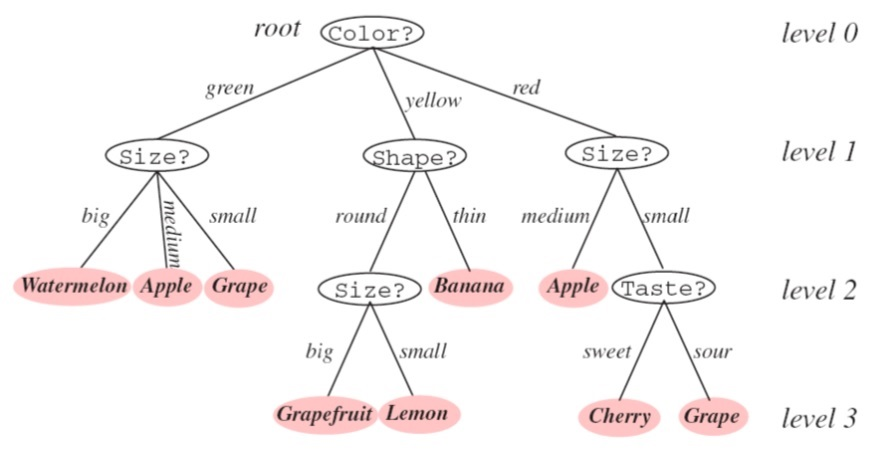

In [2]:
Image('../SDataset/Decision tree representation.jpg')

 - Each Internal node represent test on an attribute
 - Each edge corresponds to attributes value
 - Each leaf node assigns a classification

### APPROPRIATE PROBLEMS FOR DECISION TREE LEARNING
 - Instances are represented by attribute-value pairs. Instances are described by a fixed set of attributes (e.g., Size) and their values (e.g., big, Medium, Small)
 - The target function has discrete output values.(e.g., watermelon(0), Apple(1), Grape(2), Banana(3), Cherry(4) and so on to each example.
 - Disjunctive descriptions may be required.
 - The training data may contain errors. Decision tree learning methods are robust to errors, both errors in classifications of the training examples and errors in the attribute values that describe these examples.
 
 - The training data may contain missing attribute values. Decision tree methods can be used even when some training examples have unknown values


# ID3(Iterative Dichotomiser)

- ID3(only Classification) is one of the most common decision tree algorithm. Dichotomiser means dividing into two completely opposite things.
- So, the algorithm iteratively divides attributes into two groups which are the most dominant attribute and others to construct a tree. Then, it calculates the entropy and information gains of each attribute. In this way, the most dominant attribute can be founded.
- After then, the most dominant one is put on the tree as decision node. Thereafter, entropy and gain scores would be calculated again among the other attributes. Thus, the next most dominant attribute is found.
- Finally, this procedure continues until reaching a decision for that branch.
- That’s why, it is called Iterative Dichotomiser.

## Entropy
Entropy measures the impurity of a collection of examples. It depends on the distribution of the random variable.Entropy, in general, measures the 
amount of information in a random variable

S is a sample of training example

$p_{(+)}$ is the proportion of positve examples in S

$p_{(-)}$ is the proportion of negative examples in S

Entropy (here giving example for binary class) measures the impurity of S : $Entropy(S) = -p_{(+)} log_2 p_{(+)} -  p_{(-)} log_2 p_{(-)}$

In more general $Entropy(S) = \sum_{i = 1}^{c} -p(I)log_2(I) \qquad c$ represent class


## Information Gain
Information gain is the expected reduction in entropy caused by partitioning the examples on an attribute.

Higher the information gain, the more effective the attribute in classifying training data.

$Information ~  Gain = Entropy(S) - \sum[p(S|A).Entropy(S|A)]$


#### Points to consider for ID3 algorithm
 - If atrributes classes sampled and they all belong to same class i.e belong to class of 1 only$\rightarrow Entropy = 0$
 - If attributes classes sampled and they belong to all the classes equally .$ \rightarrow Entropy = 1$
 - $Entropy \propto \frac{1}{Information Gain}$ 
 - Lower Entropy attributes are taken for building trees or Higer Information Gain attributes are chosen for building trees

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [4]:
dataset = pd.read_csv('../SDataset/play_or_not.csv')
dataset

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
objList = dataset.select_dtypes(include = 'object')
objList

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
le = LabelEncoder()
for obj in objList:
    dataset[obj] = le.fit_transform(dataset[obj])
dataset

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,10,1,2,1,1,1


In [7]:
dataset.columns

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:, 1:5], dataset.Decision, random_state = 42, test_size = .20)
X_train.shape, X_test.shape,Y_train.shape,  Y_test.shape

((11, 4), (3, 4), (11,), (3,))

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
clf_dtc = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 2,min_samples_leaf=1, random_state = 42, splitter = 'best')

In [12]:
#For understanding purpose running classifier on whole dataset

In [13]:
#clf_dtc.fit(X_train, Y_train)
clf_dtc.fit(dataset.iloc[:, 1:5], dataset.Decision)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
#min_sample_split - defines the minimum number of samples taken  to split the nodes
#min_samples_leaf - number of samples at the leaf nodes

[]

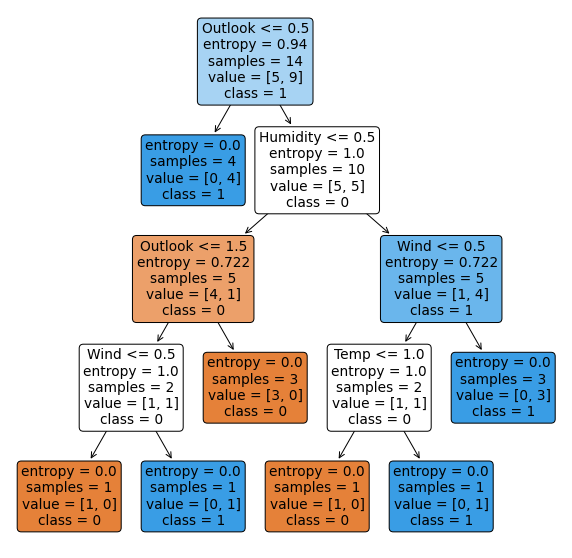

In [15]:
plt.figure(figsize = (10, 10))
tree.plot_tree(clf_dtc, feature_names = ['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], class_names = ['0','1'], filled = True, rounded = True);
plt.plot()

In [16]:
# Entropy calculation
# 1st node entropy
print(-(5/14)*np.log2(5/14)-(9/14)*np.log2(9/14))
# second left node entropy
print(-(5/10)*np.log2(5/10) - (5/10)*np.log2(5/10))

0.9402859586706311
1.0


In [17]:
clf_dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
pred = clf_dtc.predict(X_test)
print(X_test)
print(Y_test)
pred

    Outlook  Temp  Humidity  Wind
9         1     2         1     1
11        0     2         0     0
0         2     1         0     1
9     1
11    1
0     0
Name: Decision, dtype: int32


array([1, 1, 0])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:',accuracy_score(pred, Y_test)*100)

Accuracy: 100.0


In [20]:
print(confusion_matrix(pred, Y_test))
# when outcome is binary we can extract TN, FP, FN, TP as 
(TN, FP, FN, TP)  = confusion_matrix(pred, Y_test).ravel()
TN, FP, FN, TP

[[1 0]
 [0 2]]


(1, 0, 0, 2)

In [21]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

